In [1]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

In [7]:
path=work_path+"sample/rgb/padova_nc/padova.npy"
parsec = np.load(path, allow_pickle=True).tolist()
path=work_path+"sample/rgb/mist_nc/mist.npy"
mist = np.load(path, allow_pickle=True).tolist()
path=work_path+"sample/rgb/yu_nc/apk18.npy"
apokasc = np.load(path, allow_pickle=True).tolist()


def reduce_samples(Ndata, Ntarget):
    # factor = int(Ndata/Ntarget)
    # if factor <=0: factor = 1
    # idx = np.zeros(Ndata, dtype=bool)
    # idx[np.arange(0,int(Ndata/factor))*factor] = True
    idx = np.arange(0,Ntarget)*Ndata/Ntarget
    idx = np.array(idx, dtype=int)
    return idx

pidx = (parsec['radius']<18) & (parsec['radius']>6) & (parsec['mass']>0.8) & (parsec['mass']<1.75)
aidx = (apokasc['radius']<18) & (apokasc['radius']>6) & (apokasc['mass']>0.8) & (apokasc['mass']<1.75)
midx = (mist['radius']<18) & (mist['radius']>6) & (mist['mass']>0.8) & (mist['mass']<1.75)
# print(len(parsec['radius'][pidx]))
# print(len(apokasc['radius'][aidx]))
# print(len(mist['radius'][midx]))
idx = reduce_samples(len(parsec['radius'][pidx]), len(apokasc['radius'][aidx])*5)
for key in parsec.keys():
    parsec[key] = parsec[key][pidx][idx]
idx = reduce_samples(len(mist['radius'][midx]), len(apokasc['radius'][aidx])*5)
for key in mist.keys():
    mist[key] = mist[key][midx][idx]

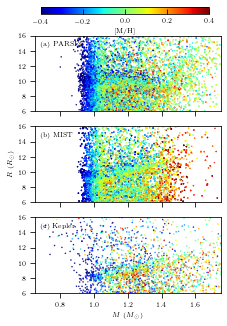

In [8]:
fig = plt.figure(figsize=mnras_size(ratio=1.5))
axes = fig.subplots(nrows=3, ncols=1, squeeze=False, sharex=True).reshape(-1)

import matplotlib.colors
norm = matplotlib.colors.Normalize(vmin=-0.4, vmax=0.4)
errstyles = {'norm':norm, 'cmap':'jet', 'marker':'.', 's':1, 'rasterized':True}#cmap_diverging(n=20)

axes[0].scatter(parsec['mass'], parsec['radius'], c=parsec['feh'],  **errstyles)
axes[1].scatter(mist['mass'], mist['radius'], c=mist['feh'], **errstyles)
c=axes[2].scatter(apokasc['mass'], apokasc['radius'], c=apokasc['feh'], **errstyles)

axes[0].text(0.03,0.93, '(a) PARSEC', va='top', ha='left', transform=axes[0].transAxes)
axes[1].text(0.03,0.93, '(b) MIST', va='top', ha='left', transform=axes[1].transAxes)
axes[2].text(0.03,0.93, '(c) Kepler', va='top', ha='left', transform=axes[2].transAxes)

for ax in axes:
    ax.axis([0.65, 1.75, 6, 16]) #12

axes[2].set_xlabel('$M$ ($M_\odot$)')
axes[1].set_ylabel('$R$ ($R_\odot$)')

# plot colorbar
fig.subplots_adjust(top=0.84)
cax = fig.add_axes([0.15, 0.9, 0.7, 0.02]) # left, bottom, width, height
fig.colorbar(c, cax=cax, orientation='horizontal').set_label('[M/H]')
cax.tick_params(direction='in')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(overleaf_path+'rgbb_isochrone.pdf')

In [26]:
# bins=np.arange(-1.5, 0.5, 0.1)

# plt.hist(apokasc['feh'], bins=bins, histtype='step', label='Kepler')
# plt.hist(mist['feh'], bins=bins, histtype='step', label='MIST')
# plt.hist(parsec['feh'], bins=bins, histtype='step', label='PARSEC')
# plt.legend()